# Overview
Plot the percentage fused against the max fusion length for each file

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import json

In [37]:
with open('config.json') as f:
    data = json.load(f)

path = f"{data['dirPath']}/{data['dirName']}"
csv_path = f"{path}/overview.csv"
img_path = f"{path}/overview.png"

In [38]:
df = pd.read_csv(csv_path)
df['end'] = df['end'].str.strip() # strip newline characters

In [39]:
print(df['end'].apply(repr))

0                    nan
1                    nan
2                    nan
3                    nan
4                    nan
             ...        
275    'MEMORY & BRANCH'
276    'MEMORY & BRANCH'
277    'MEMORY & BRANCH'
278    'MEMORY & BRANCH'
279    'MEMORY & BRANCH'
Name: end, Length: 280, dtype: object


In [40]:
print(df['end'].unique())

[nan 'MEMORY' 'BRANCH' 'MEMORY & BRANCH']


In [41]:
df.columns

Index(['file', 'fusable', 'end', 'max_fusable_length', 'total_instructions',
       'instructions_after_fuse', 'instructions_fused', 'percentage_fused',
       'average_fusion_length'],
      dtype='object')

In [42]:
grouped = df.sort_values(by=['file', 'fusable', 'end'], na_position='first')
grouped = grouped.groupby(['file', 'fusable', 'end'], dropna=False, sort=False)

In [43]:
print(grouped)

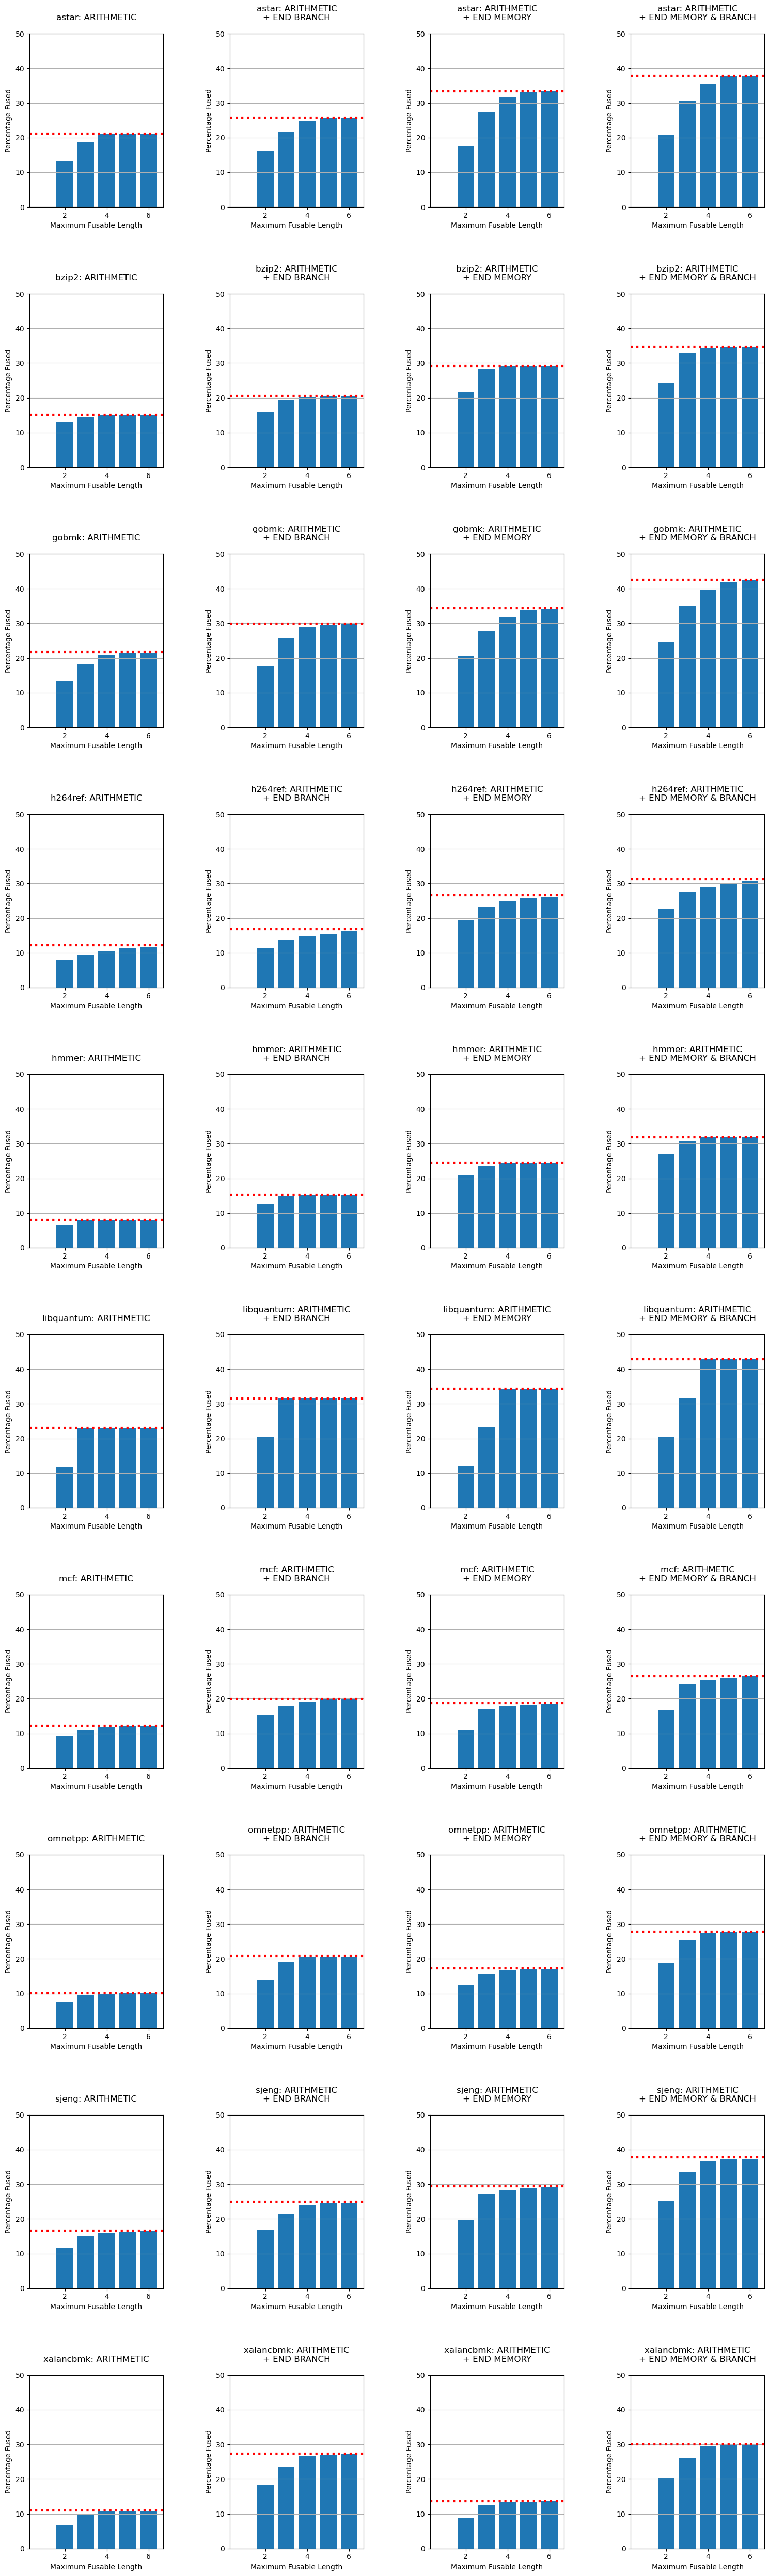

In [44]:
num_groups = len(grouped)
cols = 4
rows = math.ceil(num_groups / cols)
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()

for i, (group_name, group_data) in enumerate(grouped):
    if (pd.notna(group_name[2])):
        end_name = f"+ END {group_name[2]}\n"
    else:
        end_name = ""
    
    group_title = (
        f"{group_name[0]}: "
        f"{group_name[1]}\n"
        f"{end_name}"
    )

    data = group_data.reset_index()
    first_value = data['percentage_fused'].iloc[0]
    axes[i].axhline(y=first_value, color='red', linestyle='dotted', linewidth=3)
    axes[i].bar(data['max_fusable_length'][1:7], data['percentage_fused'][1:7])
    axes[i].set_title(f'{group_title}')
    axes[i].set_xlabel('Maximum Fusable Length')
    axes[i].set_ylabel('Percentage Fused')
    axes[i].tick_params(axis='x')
    axes[i].grid(axis='y')
    axes[i].set_ylim(bottom=0, top=50)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.savefig(img_path, dpi=300, bbox_inches='tight')
plt.show()